In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from empiricaldist import Pmf

In [4]:
# Train problem

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [5]:
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [6]:
data = 60
posterior = prior.copy()

update_train(posterior, data)

<Axes: title={'center': 'Posterior distribution'}, xlabel='Number of trains', ylabel='PMF'>

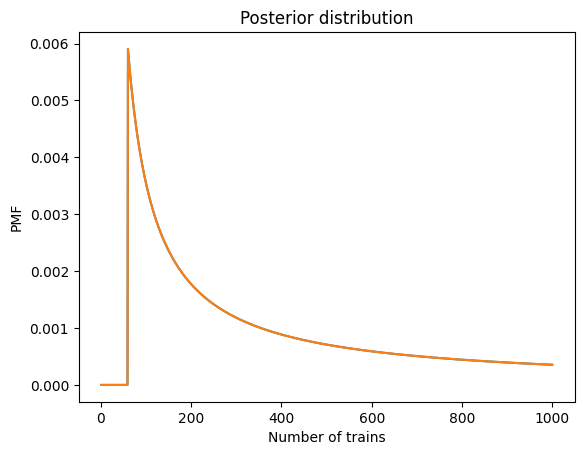

In [7]:
posterior.plot(label="Posterior after train 60")
posterior.plot(xlabel="Number of trains", ylabel="PMF", title="Posterior distribution")

In [8]:
posterior.max_prob()

np.int64(60)

In [9]:
posterior.mean() # Same as np.sum(posterior.ps * posterior.qs)

np.float64(333.41989326370776)

In [10]:
# Power law prior

alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name="uniform")
uniform.normalize()

np.int64(1000)

<Axes: title={'center': 'Prior distributions'}, xlabel='Number of trains', ylabel='PMF'>

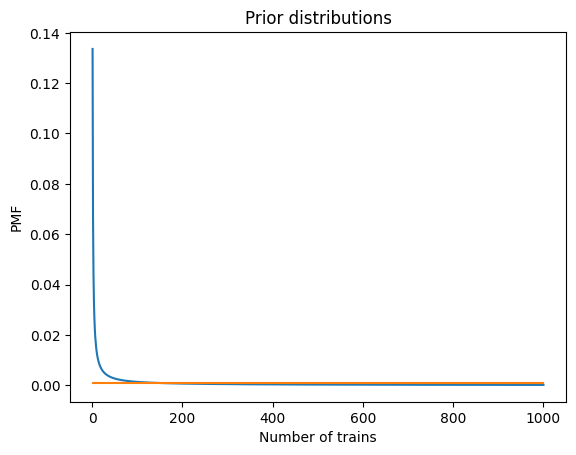

In [11]:
power.plot(xlabel="Number of trains", ylabel="PMF", title="Prior distributions")
uniform.plot()

In [12]:
dataset = [60]
update_train(uniform, dataset)
update_train(power, dataset)

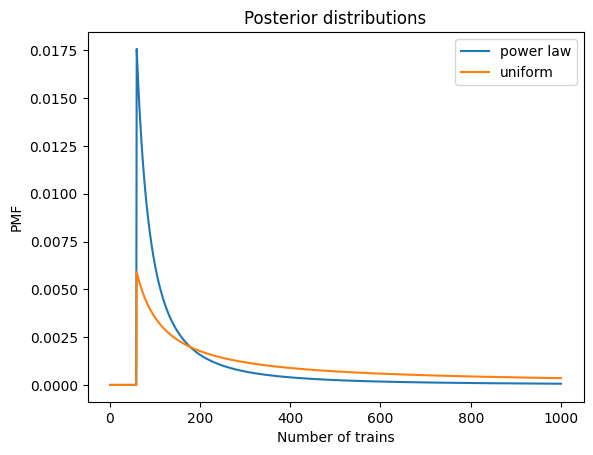

In [14]:
power.plot(xlabel="Number of trains", ylabel="PMF", title="Posterior distributions")
uniform.plot()
plt.legend()

In [15]:
def quantile(pmf, prob):
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

In [16]:
quantile(power, 0.5)

112

In [17]:
power.quantile([0.05, 0.95])

array([ 62., 559.])

In [19]:
power.credible_interval(0.9)

array([ 62., 559.])

In [20]:
uniform.credible_interval(0.9)

array([ 69., 869.])

In [21]:
quantile(uniform, 0.5)

244

In [22]:
power.prob_le(100)

np.float64(0.43374679026783564)

In [23]:
# Exercise 5-1
# We are not provided any information informing a prior expectation on the number of people in the room.
# Data: 2 people in the room were born on 5/11, 1 person on 5/23, 0 people on 8/1
# We are given a hint to use the binomial distribution

# Trying to walk through the solution provided

# The solution begins with a uniform prior from 1 to 2000.

hypos = np.arange(1, 2000) # the solution adds a step term (np.arange(1, 2000, 10)) without explanation. I'll try without it.
prior = Pmf(1, hypos)
prior.normalize()

# The likelihood is the probability of the data for each hypothetical audience size. The solution uses the binomial for it.

from scipy.stats import binom

# No explanation for why 3 likelihoods are specified or why the updates aren't done sequentially (or whether that matters)

likelihood1 = binom.pmf(2, hypos, 1/365)
likelihood2 = binom.pmf(1, hypos, 1/365)
likelihood3 = binom.pmf(0, hypos, 1/365)

posterior = prior * likelihood1 * likelihood2 * likelihood3
posterior.normalize()

np.float64(0.006762190887651716)

<Axes: xlabel='Number of people in the audience', ylabel='PMF'>

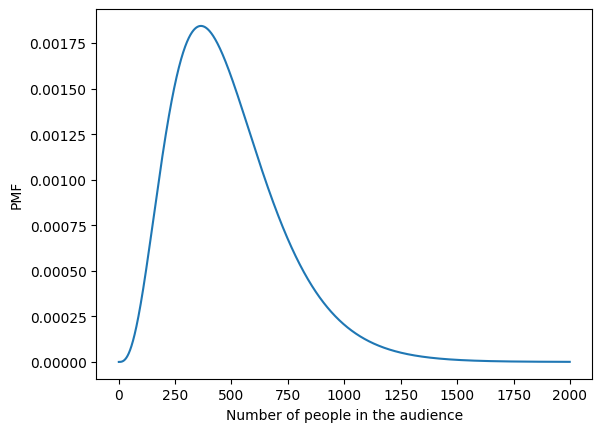

In [24]:
posterior.plot(xlabel="Number of people in the audience", ylabel="PMF")

In [25]:
posterior.mean()

np.float64(486.2278641524624)

In [26]:
posterior.prob_gt(1200)

np.float64(0.011237085194742024)

In [5]:
# Exercise 5-2

# We're given a uniform prior between 4 and 10

hypos = np.arange(4, 11)
prior = Pmf(1, hypos)
prior.normalize()

# Likelihood is the probability of observing the data given each hypothetical number of rabbits
# We've observed 2 rabbits that appear to be the same rabbit, and a rabbit that looks different
# According to the solution:
# Pr that rabbits 1 and 2 are the same rabbit = 1/hypos, or the probability that we're just observing a single rabbit
# Pr that the third rabbit is different, or Pr of observing a new rabbit = (hypos - 1) / hypos.

likelihood = (hypos-1) / hypos**2

posterior = prior * likelihood
posterior.normalize()

np.float64(0.129568328654213)

Text(0.5, 1.0, 'The Rabbit Problem')

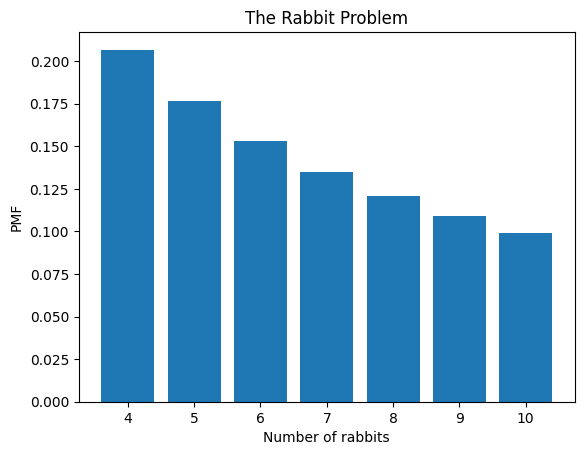

In [6]:
plt.bar(hypos, posterior)
plt.xlabel("Number of rabbits")
plt.ylabel("PMF")
plt.title("The Rabbit Problem")

In [7]:
# Exercise 5-3

hypos = np.arange(1, 4)
prior = Pmf(1/3, hypos)
prior.normalize()

# The solution gives the likelihood as equal to hypos. If you visit the prison at any given time, the likelihood
# of observing any given prisoner is proportional to the length of his sentence.
# So the likelihood of observing a 2-yr prisoner is 2x the likelihood of observing a 1-yr prisoner
# The likelihood of observing a 3-yr prisoner is 3x the likelihood of observing a 1-yr prisoner

likelihood = hypos

posterior = prior * likelihood
posterior.normalize()

np.float64(2.0)

In [8]:
posterior

,probs
1,0.166667
2,0.333333
3,0.500000


In [9]:
posterior.mean() # This is the average sentence in the prison

np.float64(2.333333333333333)

In [10]:
posterior.mean() / 2 # Which means that half of the average sentence is the average remaining sentence

np.float64(1.1666666666666665)

In [11]:
# Exercise 5-4
# What is the probability that a randomly chosen US adult has at least 1 sibling?
# Or, what is the probability that a randomly chosen adult's mother has had >=2 children?
# According to the article, 22% of mothers have only 1 child, so 78% have >= children

# The solution sets up the prior as follows:
qs = [1, 2, 3, 4]
ps = [22, 41, 24, 14]
prior = Pmf(ps, qs)
prior.normalize()

# Much like the last problem, the likelihood of choosing an adult from a particular size family is directly
# proportional to how large their family is.
likelihood = qs
posterior = prior * likelihood
posterior.normalize()

np.float64(2.2970297029702973)

In [12]:
posterior

,probs
1,0.094828
2,0.353448
3,0.310345
4,0.241379


In [14]:
1 - posterior[1]

np.float64(0.9051724137931034)

In [15]:
posterior.prob_gt(1)

np.float64(0.9051724137931034)

In [16]:
# Exercise 5-5

hypos = [200, 2000]
prior = Pmf(1/2, hypos)
prior.normalize()

likelihood = 1/prior.qs # This is like the train problem. We don't really need the 108 data.
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
200,0.909091
2000,0.090909


In [18]:
# Ex 5-1 ALT SOLUTION
# What if we choose a different prior? By the assumptions of the problem we can see the crowd,
# so the lower limit of 1 seems unrealistic. What if we put the lower bound at 200?

hypos = np.arange(200, 2000) # the solution adds a step term (np.arange(1, 2000, 10)) without explanation. I'll try without it.
prior = Pmf(1, hypos)
prior.normalize()

# The likelihood is the probability of the data for each hypothetical audience size. The solution uses the binomial for it.

from scipy.stats import binom

# No explanation for why 3 likelihoods are specified or why the updates aren't done sequentially (or whether that matters)

likelihood1 = binom.pmf(2, hypos, 1/365)
likelihood2 = binom.pmf(1, hypos, 1/365)
likelihood3 = binom.pmf(0, hypos, 1/365)

posterior = prior * likelihood1 * likelihood2 * likelihood3
posterior.normalize()

np.float64(0.006876588437480748)

In [19]:
posterior.mean()

np.float64(517.2173781164174)

In [20]:
posterior.prob_gt(1200)

np.float64(0.012271802465972162)

In [ ]:
# So, not terribly sensitive to the prior